# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Rifda Qurrotul 'Ain
- **Email:** rifda.q.a@gmail.com
- **ID Dicoding:** MC123D5X2017

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1:

Pada jam berapa jumlah penyewaan sepeda tertinggi dan terendah terjadi, baik untuk pengguna umum maupun pengguna terdaftar?

- Pertanyaan 2:

Pada musim apa jumlah penyewaan sepeda tertinggi dan terendah terjadi, baik untuk pengguna umum maupun pengguna terdaftar?

- Pertanyaan 3:

Bagaimana tren jumlah penyewaan bulanan  sepeda perusahaan dalam beberapa bulan terakhir?


## Import Semua Packages/Library yang Digunakan

In [1]:
# memanggil semua library yang dibutuhkan.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Memuat dataset hour
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight**
---
Dataset ini memiliki beberapa kolom penting yang perlu diperhatikan, antara lain:
1. instant: Nomor indeks atau urutan data.
dteday: Tanggal pencatatan data.
season: Musim dalam bentuk angka (1: Musim semi, 2: Musim panas, 3: Musim gugur, 4: Musim dingin).
2. yr: Tahun pencatatan data (0 = 2011, 1 = 2012).
3. mnth: Bulan pencatatan data (1 hingga 12).
4. hr: Jam pencatatan dalam format 24 jam.
5. holiday: Indikator hari libur (1 = hari libur, 0 = bukan hari libur).
6. weekday: Hari dalam seminggu (0 = Minggu, 1 = Senin, dan seterusnya).
7. workingday: Indikator hari kerja (1 = hari kerja, 0 = bukan hari kerja).
8. weathersit: Kondisi cuaca dalam bentuk kategori (1 = cerah/berawan, 2 = berkabut, 3 = hujan ringan, 4 = hujan lebat).
9. temp: Suhu aktual dalam skala 0 hingga 1.
10. atemp: Suhu yang dirasakan dalam skala 0 hingga 1.
11. hum: Tingkat kelembapan dalam skala 0 hingga 1.
12. windspeed: Kecepatan angin dalam skala 0 hingga 1.
13. casual: Jumlah pengguna yang tidak terdaftar.
14. registered: Jumlah pengguna yang terdaftar.
15. cnt: Total jumlah sepeda yang disewa.

In [3]:
# Memuat dataset hour
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight**
---
Dataset ini memiliki beberapa kolom penting yang mirip dengan dataset hour, hanya saja datanya berbentuk harian sehingga tidak ada variabel hour/jam.

### Assessing Data

In [4]:
# memeriksa tipe data data dari tiap kolom yang terdapat dalam hour_df beserta statistik deskriptifnya
hour_df.info()
hour_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight**
- **Jumlah data**: 17.379 baris dan 16 kolom.  
- **Tidak ada missing values**: Semua kolom memiliki **17.379 non-null values**.  
- **Tipe data**:  
  - **Integer**: Kolom seperti `season`, `yr`, `mnth`, `hr`, `holiday`, `weekday`, `workingday`, `weathersit`, `casual`, `registered`, dan `cnt`.  
  - **Float**: Kolom `temp`, `atemp`, `hum`, dan `windspeed`.  
  - **String**: Kolom `dteday` (tanggal dalam format string).  Ada kesalahan tipe data pada dteday, yang seharusnya memiliki tipe data datetime.
- **Ukuran memori dataset**: 2.3+ MB.  
  

**Analisis Statistik**  

- **Hari kerja lebih dominan dalam dataset**: *Rata-rata workingday = 0.68*, menunjukkan lebih banyak data berasal dari hari kerja dibanding akhir pekan.  
- **Hari libur jarang terjadi**: *Rata-rata holiday = 0.028*, menunjukkan bahwa hanya sekitar 2.8% data berasal dari hari libur.  
- **Mayoritas kondisi cuaca adalah kategori 1 & 2**: Sebagian besar data memiliki kondisi cuaca cerah hingga berkabut.  
- **Temperatur berkisar antara 0.02 - 1.00 (skala normalisasi)**: *Rata-rata = 0.49*, dengan standar deviasi 0.19.  
- **Kelembapan cukup tinggi**: *Rata-rata = 0.63*, menunjukkan sebagian besar hari memiliki tingkat kelembapan sedang hingga tinggi.  
- **Kecepatan angin relatif rendah**: *Rata-rata = 0.19*, dengan standar deviasi 0.12.  
- **Penyewaan sepeda oleh pengguna kasual lebih sedikit dibanding pengguna terdaftar**:  
  - *Casual Users*: Rata-rata 35.68, maksimum 367.  
  - *Registered Users*: Rata-rata 153.79, maksimum 886.  
- **Total penyewaan harian cukup bervariasi**:  
  - *Rata-rata = 189.46 sepeda/hari*.  
  - *Minimum 1 sepeda*, *maksimum 977 sepeda*.  
  - *Standar deviasi 181.39*, menunjukkan variasi penyewaan yang cukup besar antar jam.  
- **Pengguna Kasual**: Distribusi kemungkinan *right-skewed* (condong ke kanan), karena nilai *Q1* (persentil ke-25) adalah **4**, jauh lebih kecil dibanding *Q3* (persentil ke-75) yang mencapai **48**. Selain itu, standar deviasi (**49**) yang lebih besar dari rata-rata (**35**) menunjukkan bahwa data memiliki penyebaran yang luas.  

- **Pengguna Terdaftar**: Distribusi juga kemungkinan *right-skewed*, karena *Q1* (**34**) jauh lebih kecil dibanding *Q3* (**220**). Standar deviasi (**151**) yang hampir sama dengan rata-rata (**153**) menunjukkan bahwa variasi data cukup besar namun masih terpusat di sekitar nilai rata-rata.  

- **Total Penyewaan (cnt)**: Memiliki penyebaran data yang cukup besar, dengan standar deviasi (**181**) yang tidak terlalu jauh dari rata-rata (**189**). Rentang nilai sangat lebar, dari **1** hingga **977**, yang menunjukkan adanya potensi outlier. Nilai *Q1* (**40**) yang jauh lebih kecil dari *Q3* (**281**) juga mengindikasikan distribusi yang kemungkinan *right-skewed*.


In [5]:
# memeriksa tipe data data dari tiap kolom yang terdapat dalam day_df beserta statistik deskriptifnya
day_df.info()
day_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight**
- **Jumlah data**: 731 baris dan 16 kolom.  
- **Tidak ada missing values**: Semua kolom memiliki **731 non-null values**.  
- **Tipe data**:  
  - **Integer**: Kolom seperti `season`, `yr`, `mnth`, `instant`, `holiday`, `weekday`, `workingday`, `weathersit`, `casual`, `registered`, dan `cnt`.  
  - **Float**: Kolom `temp`, `atemp`, `hum`, dan `windspeed`.  
  - **String**: Kolom `dteday` (tanggal dalam format string).  Ada kesalahan tipe data pada dteday, yang seharusnya memiliki tipe data datetime.
- **Ukuran memori dataset**: 91.5+ KB.  
  

**Analisis Statistik**  

Dataset berisi 731 data harian dengan rata-rata penyewaan sepeda 4.504 unit per hari. Mayoritas penyewa adalah pengguna terdaftar (3.656) dibandingkan pengguna kasual (848). Penyewaan tertinggi mencapai 8.670, sementara terendah hanya 22 unit, menunjukkan variasi yang besar. Musim memiliki distribusi yang cukup merata dengan rata-rata berada di antara 2-3 (Spring-Summer-Fall). Sebagian besar hari dalam dataset adalah hari kerja (68% merupakan working day), sementara hari libur hanya sekitar 2.8%. Standar deviasi jumlah penyewaan cukup besar (1.937 unit), menandakan adanya fluktuasi tinggi dalam permintaan sepeda. Interquartile range (IQR) untuk total penyewaan berkisar antara 3.152 (Q1) hingga 5.956 (Q3), menunjukkan bahwa 50% dari data penyewaan harian berada dalam rentang tersebut.
Kesimpulan Statistik

In [6]:
# memeriksa apakah ada data yg duplikat
print("Jumlah duplikasi pada hour dataset: ", hour_df.duplicated().sum())
print("Jumlah duplikasi pada day dataset: ", day_df.duplicated().sum())

Jumlah duplikasi pada hour dataset:  0
Jumlah duplikasi pada day dataset:  0


## **Insight:**

Tidak ada data yang duplikat pada kedua dataset tersebut

### Cleaning Data

1. Mengubah tipe data kolom dteday menjadi tipe datetime untuk mempermudah analisis waktu.
2. Mapping variabel kategorikal (season, weathersit, weekday, mnth, yr, holiday & workingday) supaya lebih mudah dipahami.
3. Menghapus kolom instant karena tidak diperlukan dan memperbaiki penamaan variabel agar mudah dibaca.


In [7]:
# mengubah tipe data dteday dari object menjadi datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**


Tipe data dan nama dteday sudah berganti menjadi datetime

In [8]:
# Konversi variabel kategorikal
hour_df['season'] = hour_df['season'].map({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})

hour_df['weathersit'] = hour_df['weathersit'].map({
    1: 'Clear',
    2: 'Mist/Cloudy',
    3: 'Light Rain',
    4: 'Heavy Rain'
})

hour_df['weekday'] = hour_df['weekday'].map({
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
})

hour_df['mnth'] = hour_df['mnth'].map({
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
})

hour_df['yr'] = hour_df['yr'].map({
    0: '2011',
    1: '2012'
})

hour_df['holiday'] = hour_df['holiday'].map({
    0: 'Non-Holiday',
    1: 'Holiday'
})

hour_df['workingday'] = hour_df['workingday'].map({
    0: 'Non-Working Day',
    1: 'Working Day'
})

# Menampilkan sample data setelah konversi
hour_df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,Non-Holiday,Saturday,Non-Working Day,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,Non-Holiday,Saturday,Non-Working Day,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,Non-Holiday,Saturday,Non-Working Day,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,Non-Holiday,Saturday,Non-Working Day,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,Non-Holiday,Saturday,Non-Working Day,Clear,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**


1. Konversi data kategorikal dengan map() berhasil dan sudah berganti menjadi label deskriptif.
2. Perubahan yang Dilakukan
  * season → Menjadi "Spring", "Summer", "Fall", "Winter".
  * weathersit → Menggunakan deskripsi kondisi cuaca.
  * weekday → Menggunakan nama hari.
  * mnth → Menggunakan nama bulan.
  * yr → Menjadi "2011" atau "2012" agar lebih jelas.
  * holiday & workingday → Menjadi deskripsi "Holiday" / "Non-Holiday" dan "Working Day" / "Non-Working Day".

In [9]:
# menghapus kolom instant
hour_df.drop(columns=['instant'], inplace=True)

# Mengubah nama kolom agar lebih mudah dipahami
hour_df.rename(columns={
    'dteday': 'date',
    'season': 'season',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'holiday': 'holiday_status',
    'weekday': 'weekday',
    'workingday': 'working_status',
    'weathersit': 'weather_condition',
    'temp': 'temperature',
    'atemp': 'feels_like_temp',
    'hum': 'humidity',
    'windspeed': 'wind_speed',
    'casual': 'casual_users',
    'registered': 'registered_users',
    'cnt': 'total_rentals'
}, inplace=True)

# Menampilkan hasil perubahan
hour_df.head()


,date,season,year,month,hour,holiday_status,weekday,working_status,weather_condition,temperature,feels_like_temp,humidity,wind_speed,casual_users,registered_users,total_rentals
0,2011-01-01,Spring,2011,January,0,Non-Holiday,Saturday,Non-Working Day,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,2011,January,1,Non-Holiday,Saturday,Non-Working Day,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,2011,January,2,Non-Holiday,Saturday,Non-Working Day,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,2011,January,3,Non-Holiday,Saturday,Non-Working Day,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,2011,January,4,Non-Holiday,Saturday,Non-Working Day,Clear,0.24,0.2879,0.75,0.0,0,1,1


**Insight Before vs After Column Renaming**  

| **Before**         | **After**           |  
|--------------------|--------------------|  
| `instant`         | *(Dihapus - tidak diperlukan)* |  
| `dteday`          | `date`              |  
| `season`          | `season`            |  
| `yr`              | `year`              |  
| `mnth`            | `month`             |  
| `hr`              | `hour`              |  
| `holiday`         | `holiday_status`    |  
| `weekday`         | `weekday`           |  
| `workingday`      | `working_status`    |  
| `weathersit`      | `weather_condition` |  
| `temp`            | `temperature`       |  
| `atemp`           | `feels_like_temp`   |  
| `hum`             | `humidity`          |  
| `windspeed`       | `wind_speed`        |  
| `casual`          | `casual_users`      |  
| `registered`      | `registered_users`  |  
| `cnt`             | `total_rentals`     |  

**Perubahan:**  
* **Menghapus `instant`** karena hanya ID dan tidak berguna untuk analisis.  
* **Membuat nama lebih jelas**, misalnya `atemp` → `feels_like_temp`, `cnt` → `total_rentals`.  

## Exploratory Data Analysis (EDA)


## 1. **Penanganan Outliers**  
   - Mengidentifikasi outliers pada fitur yang relevan, terutama jumlah penyewaan (`total_rentals`), pengguna `casual`, dan `registered` dengan menggunakan IQR (Interquartile Range).
   - Menampilkan boxplot sebelum & sesudah penanganan outliers.
   - Menangani outliers dengan metode Winsorizing atau mengganti nilai outlier ke batas bawah atau atas.


In [10]:
# Identifikasi outliers dengan IQR
import pandas as pd

# Fungsi untuk mendeteksi outliers menggunakan IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Mendeteksi outliers pada beberapa kolom
outlier_counts = {}
columns_to_check = ['casual_users', 'registered_users', 'total_rentals']

for col in columns_to_check:
    outliers = detect_outliers_iqr(hour_df, col)
    outlier_counts[col] = len(outliers)

# Menampilkan jumlah outlier per kategori
pd.DataFrame(outlier_counts.items(), columns=['Feature', 'Outlier Count'])


,Feature,Outlier Count
0,casual_users,1192
1,registered_users,680
2,total_rentals,505


**Insight**
1. **Casual Users (1192 outliers)**  
   - Memiliki jumlah outlier tertinggi, menunjukkan bahwa jumlah penyewaan oleh pengguna **kasual (non-terdaftar)** sangat bervariasi.  

2. **Registered Users (680 outliers)**  
   - Pengguna terdaftar cenderung memiliki pola peminjaman yang lebih stabil dibanding casual users.  
   - Ada beberapa kasus ekstrem di mana pengguna terdaftar menyewa sepeda dalam jumlah yang tidak biasa.  

3. **Total Rentals (505 outliers)**  
   - Outlier ini berasal dari kombinasi casual dan registered users.  

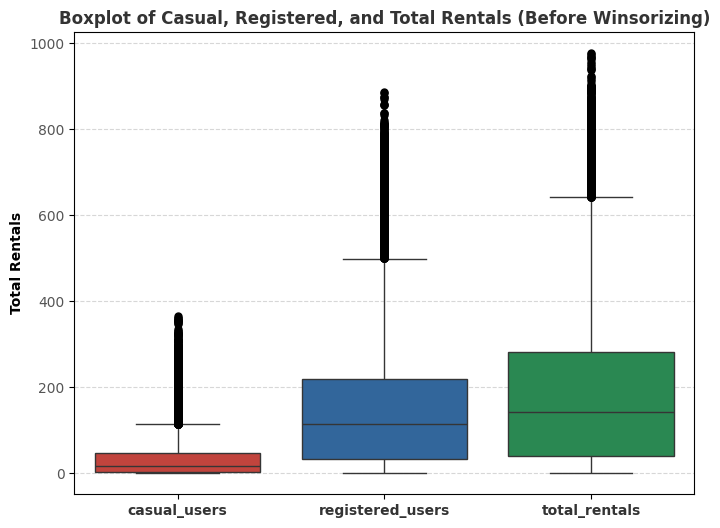

In [11]:
#Boxplot sebelum penanganan outliers
df_melted = hour_df[['casual_users', 'registered_users', 'total_rentals']].melt(
    var_name='User Type', value_name='Total Rentals'
)

# Membuat figure yang lebih besar agar outlier terlihat jelas
plt.figure(figsize=(8, 6))

# Membuat boxplot dengan flierprops untuk memperjelas outlier
sns.boxplot(x='User Type', y='Total Rentals', data=df_melted,
            hue='User Type', palette=["#D73027", "#2166AC", "#1A9850"],
            flierprops={"marker": "o", "markerfacecolor": "black", "markeredgecolor": "black", "markersize": 5})

# Mengatur judul dan tampilan
plt.title('Boxplot of Casual, Registered, and Total Rentals (Before Winsorizing)',
          fontsize=12, fontweight='bold', color='#333')
plt.xlabel('')  # Menghilangkan label sumbu X
plt.ylabel('Total Rentals', fontsize=10, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Grid agar lebih jelas
plt.xticks(fontsize=10, fontweight='bold', color='#333')  # Label X lebih jelas
plt.yticks(fontsize=10, color='#555')  # Label Y lebih jelas

# Menampilkan plot
plt.show()


**Insight**

1. **Outliers**  
   - Pada ketiga kategori (`casual_users`, `registered_users`, `total_rentals`), terlihat banyak titik outlier yang berada jauh di atas batas atas boxplot.  
   - **Registered users** dan **total rentals** memiliki lebih banyak outlier dibanding casual users, menandakan ada beberapa jam tertentu dengan jumlah penyewaan yang jauh di atas rata-rata.  

2. **Distribusi Penyewaan**  
   - **Casual Users** (Pengguna Kasual) → Sebagian besar penyewaan berada di bawah **50 rentals** dengan beberapa nilai ekstrem mencapai **300 rentals**.  
   - **Registered Users** (Pengguna Terdaftar) → Jauh lebih tinggi daripada casual users, dengan median di sekitar **100 rentals** dan beberapa nilai ekstrem mendekati **600 rentals**.  
   - **Total Rentals** → Mengikuti pola dari kedua kategori sebelumnya, dengan distribusi yang lebih lebar dan banyaknya outlier di atas **700 rentals**.  

3. **Variabilitas**  
   - Perbedaan antara kuartil bawah (Q1) dan kuartil atas (Q3) cukup besar, terutama pada **registered users** dan **total rentals**, yang menunjukkan bahwa jumlah penyewaan bervariasi cukup signifikan sepanjang hari.  

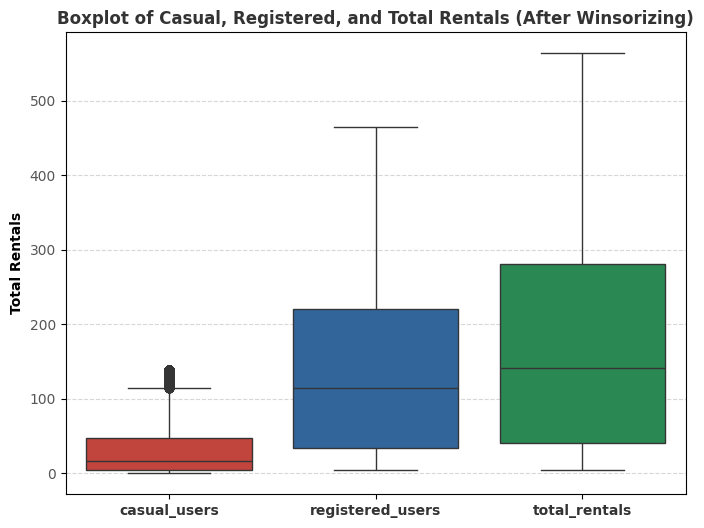

In [12]:
# Penanganan Outliers dengan Winsorizing
from scipy.stats.mstats import winsorize

def apply_winsorize(series, limits=(0.05, 0.05)):
    return winsorize(series, limits=limits)

hour_df_cleaned = hour_df.copy()
for col in ['total_rentals', 'casual_users', 'registered_users']:
    hour_df_cleaned[col] = apply_winsorize(hour_df_cleaned[col])


# Visualisasi Setelah Penanganan Outlier
plt.figure(figsize=(8, 6))

# Mengubah dataset ke format panjang agar bisa menggunakan hue
df_melted_cleaned = hour_df_cleaned[['casual_users', 'registered_users', 'total_rentals']].melt(
    var_name='User Type', value_name='Total Rentals'
)

# Membuat boxplot setelah winsorizing
sns.boxplot(x='User Type', y='Total Rentals', data=df_melted_cleaned,
            hue='User Type', palette=["#D73027", "#2166AC", "#1A9850"], legend=False)

# Mengatur judul dan tampilan
plt.title('Boxplot of Casual, Registered, and Total Rentals (After Winsorizing)',
          fontsize=12, fontweight='bold', color='#333')
plt.xlabel('')  # Menghilangkan label sumbu X
plt.ylabel('Total Rentals', fontsize=10, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Grid agar lebih jelas
plt.xticks(fontsize=10, fontweight='bold', color='#333')  # Label X lebih jelas
plt.yticks(fontsize=10, color='#555')  # Label Y lebih jelas

# Menampilkan plot
plt.show()

**Insight:**
1. **Pengurangan Outliers**  
   - Dari boxplot setelah winsorizing, jumlah titik outlier jauh berkurang dibandingkan sebelumnya.
   - Winsorizing berhasil menekan nilai ekstrem, terutama pada `casual_users`, yang sebelumnya memiliki banyak titik di luar whisker.

2. **Pola Penyewaan Lebih Jelas**  
   - Sebelum winsorizing, distribusi penyewaan tampak sangat melebar dengan banyak pencilan, terutama pada `registered_users` dan `total_rentals`.
   - Setelah winsorizing, distribusi data lebih terkonsentrasi, membuat analisis lebih stabil.

3. **Perbedaan Antara Casual dan Registered Users**  
   - **Casual Users:** Masih memiliki rentang yang lebih rendah dibanding `registered_users`. Namun, distribusi lebih stabil.
   - **Registered Users:** Masih lebih dominan dalam jumlah peminjaman dibandingkan casual users.

4. **Efek Winsorizing terhadap `total_rentals`**  
   - Sebelum winsorizing, `total_rentals` menunjukkan banyak outlier di atas 600 peminjaman per jam.
   - Setelah winsorizing, nilai ekstrem lebih terkendali, dan rentang utama berkisar di sekitar median.

## Visualization & Explanatory Analysis

- Pertanyaan 1:

Pada jam berapa jumlah penyewaan sepeda tertinggi dan terendah terjadi, baik untuk pengguna umum maupun pengguna terdaftar?

- Pertanyaan 2:

Pada musim apa jumlah penyewaan sepeda tertinggi dan terendah terjadi, baik untuk pengguna umum maupun pengguna terdaftar?

- Pertanyaan 3:

Bagaimana kinerja penyewaan perusahaan dalam beberapa tahun terakhir?

### Pertanyaan 1:

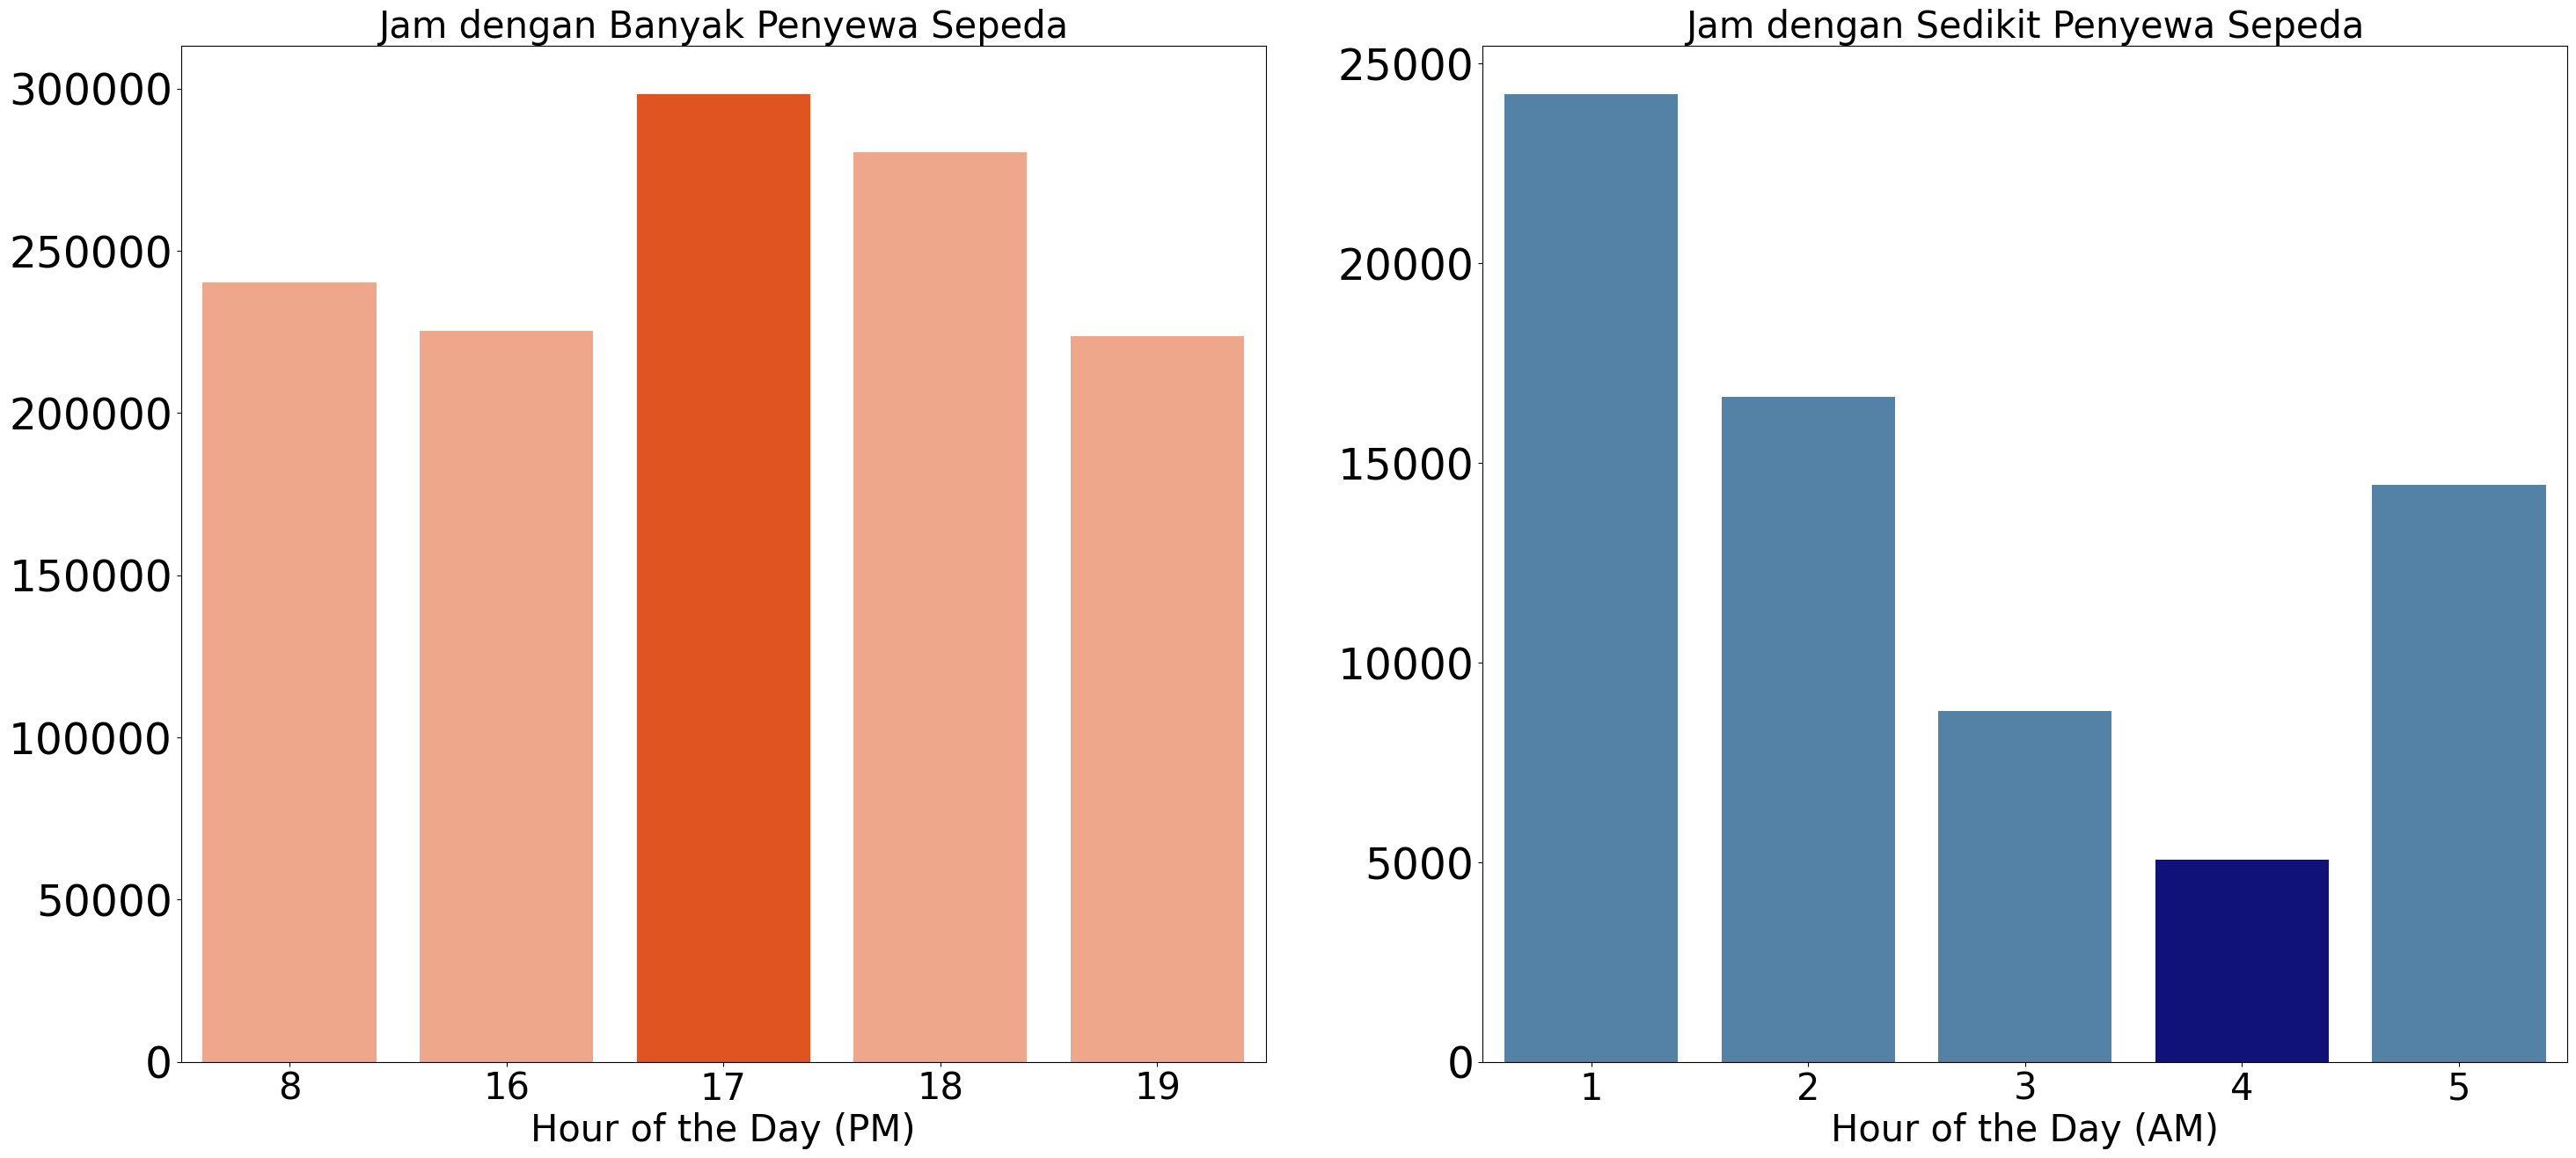

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Melakukan grouping terhadap hour dan total_rentals
sum_order_items_df = hour_df_cleaned.groupby("hour")["total_rentals"].sum().reset_index()

# Ambil top 5 penyewaan tertinggi (descending)
top_5 = sum_order_items_df.nlargest(5, "total_rentals").sort_values(by="total_rentals", ascending=False)

# Ambil top 5 penyewaan terendah (ascending)
bottom_5 = sum_order_items_df.nsmallest(5, "total_rentals").sort_values(by="total_rentals", ascending=True)

# Membuat bar chart
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35, 15))

# Membuat barplot untuk penyewa sepeda terbanyak
bars1 = sns.barplot(x="hour", y="total_rentals", hue="hour", data=top_5, dodge=False, legend=False,
                    palette=["#FFA07A", "#FFA07A", "#FF4500", "#FFA07A", "#FFA07A"], ax=ax[0])

# Mengatur label dan judul untuk subplot pertama
ax[0].set_ylabel(None)
ax[0].set_xlabel("Hour of the Day (PM)", fontsize=30)
ax[0].set_title("Jam dengan Banyak Penyewa Sepeda", loc="center", fontsize=30)
ax[0].tick_params(axis='y', labelsize=35)
ax[0].tick_params(axis='x', labelsize=30)

# Membuat barplot untuk penyewa sepeda tersedikit
bars2 = sns.barplot(x="hour", y="total_rentals", hue="hour", data=bottom_5, dodge=False, legend=False,
                    palette=["#4682B4", "#4682B4", "#4682B4", "#00008B", "#4682B4"], ax=ax[1])

# Mengatur label dan judul untuk subplot kedua
ax[1].set_ylabel(None)
ax[1].set_xlabel("Hour of the Day (AM)", fontsize=30)
ax[1].set_title("Jam dengan Sedikit Penyewa Sepeda", loc="center", fontsize=30)
ax[1].tick_params(axis='y', labelsize=35)
ax[1].tick_params(axis='x', labelsize=30)

# Menampilkan plot
plt.show()


**Insight dari Grafik**

1. Jam dengan Penyewaan Tertinggi (Grafik Kiri)
- Penyewaan sepeda paling tinggi terjadi pada **pukul 17:00 (5 PM)**, disusul oleh **pukul 18:00, 08:00, 16:00, dan 19:00**.
- **Pola ini menunjukkan dua puncak utama:**
  1. **Pagi hari sekitar jam 08:00**, kemungkinan besar dipengaruhi oleh pekerja/karyawan yang berangkat kerja.
  2. **Sore hari sekitar jam 16:00 - 19:00**, yang kemungkinan besar disebabkan oleh orang pulang kerja atau sekadar bersepeda untuk rekreasi.
- **Puncak tertinggi di jam 17:00** sangat masuk akal karena merupakan waktu pulang kerja.

2. Jam dengan Penyewaan Terendah (Grafik Kanan)
- Waktu dengan jumlah penyewaan paling sedikit terjadi di **dini hari (01:00 - 05:00)**, dengan puncak **terendah pada pukul 04:00**.
- **Alasan rendahnya penyewaan pada jam ini:**
  - Sebagian besar orang sedang tidur.
  - Transportasi sepeda kemungkinan kurang diminati pada malam hari karena faktor keamanan dan cuaca yang lebih dingin.
- **Pukul 01:00 masih memiliki penyewaan lebih banyak dibandingkan pukul 04:00**, kemungkinan karena masih ada aktivitas dari pengguna yang pulang larut malam.

### Pertanyaan 2:

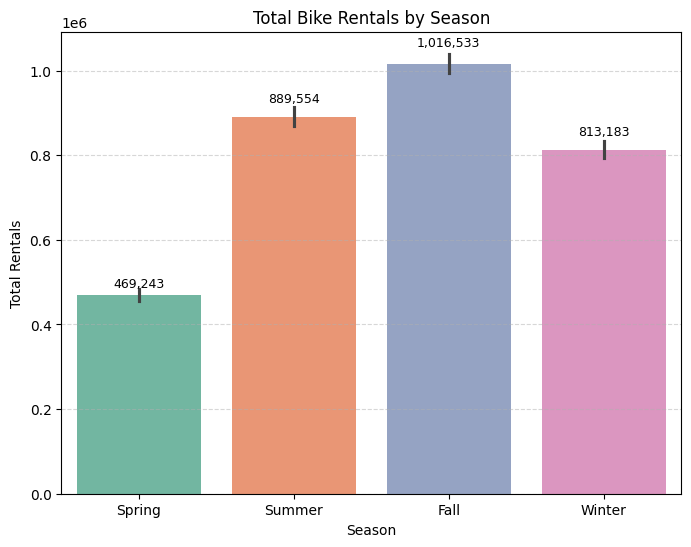

In [14]:
plt.figure(figsize=(8,6))
ax = sns.barplot(data=hour_df_cleaned, x='season', y='total_rentals',
                 estimator=sum, hue='season', palette='Set2', legend=False)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height() + (p.get_height() * 0.04),  # Tambah 2% dari tinggi batang
            f'{int(p.get_height()):,}',
            ha='center',
            fontsize=9,
            fontweight='light')

plt.title('Total Bike Rentals by Season', fontsize=12, fontweight='light')
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


**Insight:**
1. Musim Gugur (Fall) memiliki jumlah penyewaan tertinggi dengan lebih dari 1 juta penyewaan. Ini menunjukkan bahwa kondisi cuaca di musim gugur kemungkinan besar lebih ideal untuk bersepeda dibandingkan musim lainnya.
2. Musim Semi (Spring) memiliki jumlah penyewaan terendah, hanya sekitar 469 ribu penyewaan. Bisa jadi karena cuaca yang masih dingin atau sering hujan.
3. Musim Panas (Summer) dan Musim Dingin (Winter) memiliki jumlah penyewaan yang cukup tinggi, tetapi tetap lebih rendah dibandingkan Musim Gugur.

## Pertanyaan 3

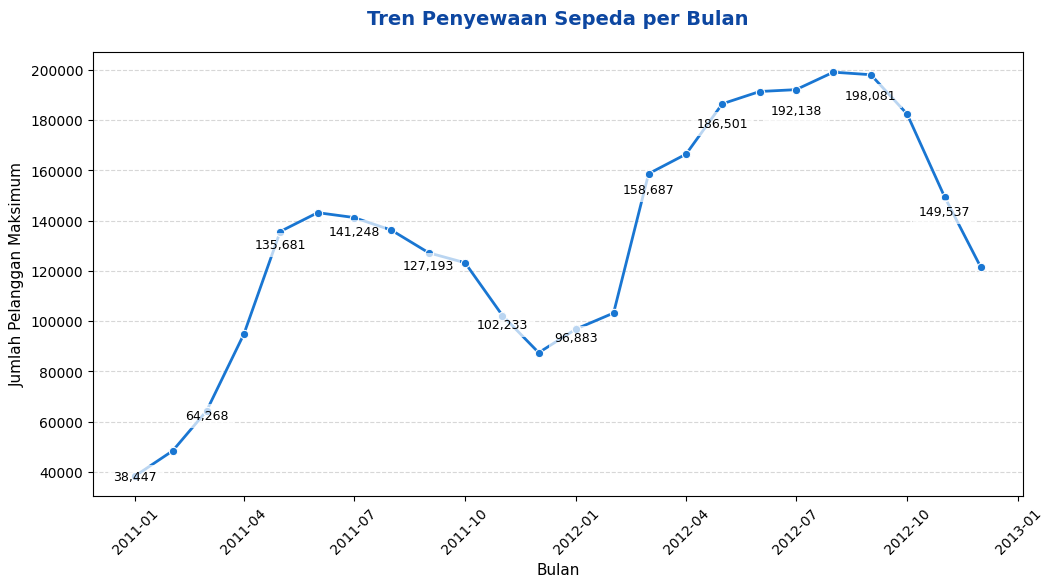

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ubah kolom tanggal ke format datetime jika belum
hour_df_cleaned['date'] = pd.to_datetime(hour_df_cleaned['date'])

# Hitung jumlah pelanggan  per bulan
monthly_counts = hour_df_cleaned.groupby(hour_df_cleaned['date'].dt.to_period('M'))['total_rentals'].sum()

# Konversi kembali index ke format datetime untuk plotting
monthly_counts.index = monthly_counts.index.to_timestamp()

# Buat figure
plt.figure(figsize=(12, 6))

# Buat line chart
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values,
             marker='o', linewidth=2, markersize=6, color='#1976D2')

# Tambahkan angka hanya setiap 2 bulan
for i, (x, y) in enumerate(zip(monthly_counts.index, monthly_counts.values)):
    if i % 2 == 0:  # Hanya setiap 2 bulan
        offset = -(y * 0.05)  # Letakkan angka sedikit di bawah
        plt.text(x, y + offset, f'{int(y):,}',
                 ha='center', fontsize=9, color='black',
                 bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))  # Tambahkan background putih

# Penamaan sumbu
plt.xlabel('Bulan', fontsize=11)
plt.ylabel('Jumlah Pelanggan Maksimum', fontsize=11)

# Tambahkan grid agar lebih terbaca
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Format sumbu x agar menampilkan bulan dengan lebih rapi
plt.xticks(rotation=45)

# Tambahkan margin atas agar angka tidak menempel ke judul
plt.subplots_adjust(top=0.85)

# Tambahkan judul dengan tampilan yang lebih menarik
plt.title('Tren Penyewaan Sepeda per Bulan',
          fontsize=14, fontweight='bold', color='#0D47A1', pad=20)  # Beri jarak antara judul dan grafik

# Tampilkan plot
plt.show()


**Insight**

Grafik menunjukkan pola musiman yang jelas dalam penggunaan sepeda, dengan lonjakan signifikan pada musim panas (Mei-Agustus) dan penurunan drastis di musim dingin (Desember-Februari). Puncak jumlah pelanggan terjadi pada Agustus 2012 (198,081 pelanggan), lebih tinggi dibandingkan puncak tahun sebelumnya (Juli 2011, 141,248 pelanggan), menandakan pertumbuhan layanan. Tren ini mencerminkan bahwa cuaca mempengaruhi permintaan, dengan peningkatan signifikan saat musim semi dimulai dan penurunan setelah musim gugur. Dibandingkan tahun 2011, penggunaan di 2012 lebih tinggi, yang dapat disebabkan oleh meningkatnya popularitas layanan atau bertambahnya pelanggan.

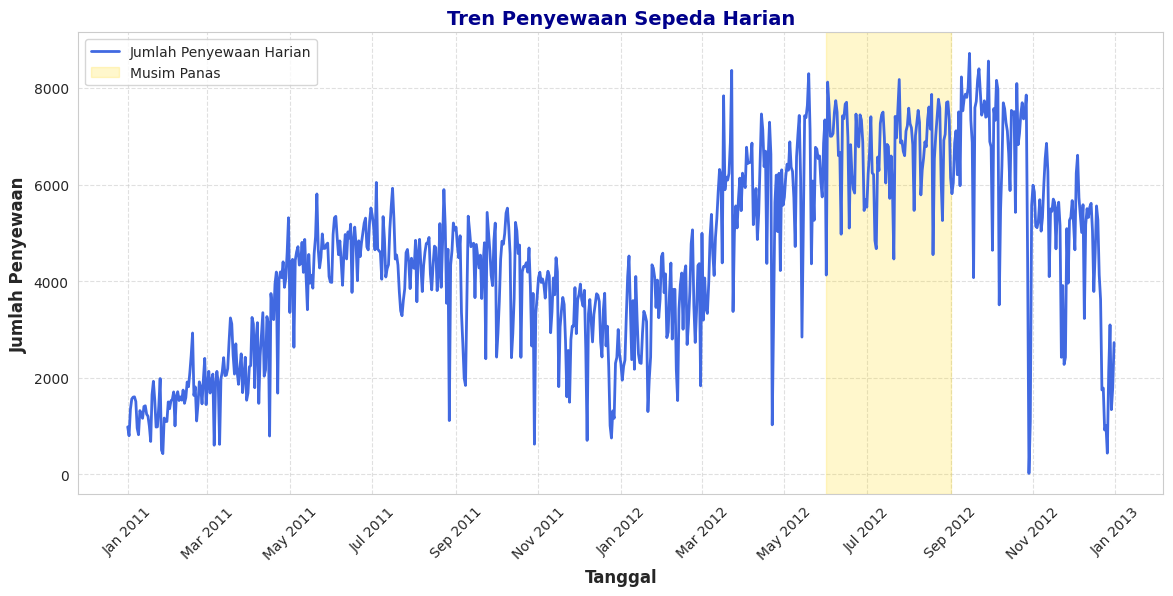

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates


sns.set_style("whitegrid")

# Buat figure
plt.figure(figsize=(14, 6))


sns.lineplot(data=day_df, x='dteday', y='cnt', color='royalblue', linewidth=2, label='Jumlah Penyewaan Harian')


plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Label setiap 2 bulan
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format bulan dan tahun
plt.xticks(rotation=45)

plt.axvspan('2012-06-01', '2012-09-01', color='gold', alpha=0.2, label="Musim Panas")

plt.xlabel("Tanggal", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Penyewaan", fontsize=12, fontweight='bold')
plt.title("Tren Penyewaan Sepeda Harian", fontsize=14, fontweight='bold', color='darkblue')

plt.grid(True, linestyle="--", alpha=0.6)


plt.legend(frameon=True, fontsize=10)

# Tampilkan plot
plt.show()


**Insight**

Grafik menunjukkan tren penyewaan sepeda harian yang meningkat dari awal 2011 hingga pertengahan 2012, dengan pola musiman yang jelas. Jumlah penyewaan mengalami kenaikan signifikan saat memasuki musim panas (Mei–Agustus), yang ditandai dengan area berwarna kuning, menunjukkan bahwa musim panas mendorong peningkatan penggunaan sepeda. Tren juga menunjukkan adanya fluktuasi harian yang cukup tinggi, dengan beberapa penurunan tajam yang mungkin disebabkan oleh faktor cuaca ekstrem atau hari libur.

## Analisis Lanjutan (Opsional)

Implementasi clustering dengan:
1. Manual Grouping yang mengelompokkan total penyewaan berdasarkan kategori musim (season), kondisi cuaca (weather_condition), status hari kerja (working status), dan status hari libur (holiday_status)
2. Teknik binning yang membagi total peminjaman sepeda (total_rentals) dalam interval rendah, sedang, tinggi.

In [17]:
# Manual Grouping
# Clustering Penyewaan Berdasarkan Kategori
categorical_features = ['season', 'weather_condition', 'working_status', 'holiday_status']

df_segmentasi = pd.concat(
    [hour_df_cleaned.groupby(feature)['total_rentals'].sum() for feature in categorical_features],
    keys=categorical_features,
    names=['Category', 'Subcategory']
).reset_index()

display(df_segmentasi)


,Category,Subcategory,total_rentals
0,season,Fall,1016533
1,season,Spring,469243
2,season,Summer,889554
3,season,Winter,813183
4,weather_condition,Clear,2254511
5,weather_condition,Heavy Rain,223
6,weather_condition,Light Rain,155940
7,weather_condition,Mist/Cloudy,777839
8,working_status,Non-Working Day,984907
9,working_status,Working Day,2203606


**Insight**  

**1. Musim (Season)**
- Musim gugur memiliki jumlah penyewaan tertinggi, kemungkinan karena cuaca masih nyaman untuk bersepeda.  
- Musim semi memiliki penyewaan terendah, kemungkinan karena transisi dari musim dingin yang kurang mendukung aktivitas bersepeda.  
- Musim panas masih memiliki jumlah penyewaan tinggi, tetapi lebih rendah dibanding musim gugur, kemungkinan karena suhu yang terlalu panas.  

**2. Kondisi Cuaca (Weather Condition)**
- Cuaca cerah memiliki jumlah penyewaan tertinggi, karena kondisi lebih nyaman untuk bersepeda.  
- Ketika berkabut atau berawan, penyewaan masih cukup tinggi, menunjukkan pengguna tetap menggunakan sepeda selama kondisi tidak ekstrem.  
- Hujan ringan menyebabkan penurunan penyewaan.  
- Hujan lebat menyebabkan penyewaan turun drastis hingga hampir nol.  

**3. Status Hari Kerja (Working Status)**
- Hari kerja memiliki jumlah penyewaan yang jauh lebih tinggi dibandingkan akhir pekan, menunjukkan mayoritas pengguna menggunakan sepeda untuk kebutuhan transportasi harian.  
- Akhir pekan dan hari libur tetap memiliki jumlah penyewaan yang signifikan, menunjukkan ada penggunaan untuk aktivitas santai atau wisata.  

**4. Status Hari Libur (Holiday Status)**
- Hari biasa memiliki jumlah penyewaan yang jauh lebih tinggi dibandingkan hari libur, mengindikasikan penggunaan sepeda lebih banyak untuk keperluan transportasi harian.  
- Pada hari libur resmi, peminjaman turun drastis, kemungkinan karena banyak orang memilih moda transportasi lain atau tidak bepergian.  

<Figure size 800x500 with 0 Axes>

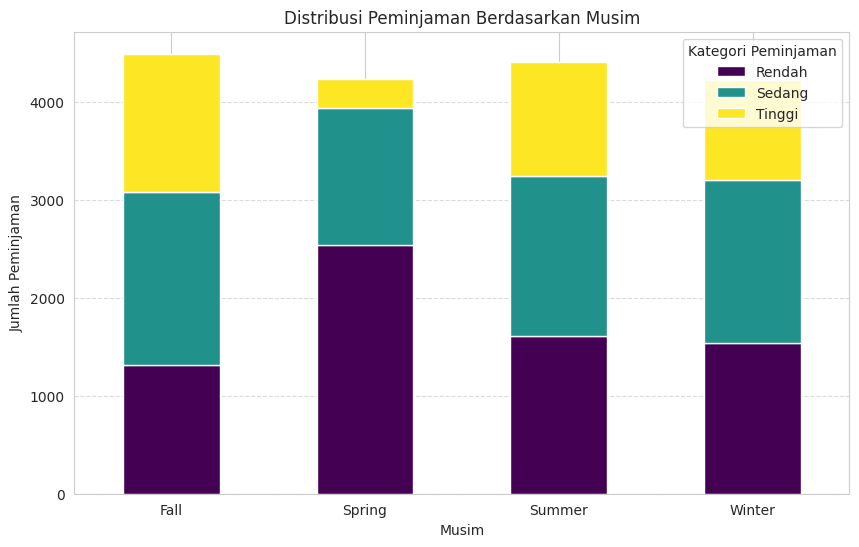

In [18]:
# Teknik Binning
# Buat kategori jumlah peminjaman
def categorize_rentals(rentals):
    if rentals < 100:
        return 'Rendah'
    elif 100 <= rentals <= 300:
        return 'Sedang'
    else:
        return 'Tinggi'

# Terapkan ke dataset
hour_df_cleaned['rental_category'] = hour_df_cleaned['total_rentals'].apply(categorize_rentals)

# Hitung distribusi kategori berdasarkan musim
season_distribution = hour_df_cleaned.groupby(['season', 'rental_category'])['total_rentals'].count().unstack()

# Visualisasi
plt.figure(figsize=(8, 5))
season_distribution.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman')
plt.title('Distribusi Peminjaman Berdasarkan Musim')
plt.legend(title='Kategori Peminjaman')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Insight**

Musim Fall dan Summer memiliki jumlah peminjaman tertinggi, terutama pada kategori sedang dan tinggi, menunjukkan bahwa kondisi cuaca pada musim ini lebih mendukung aktivitas bersepeda. Spring memiliki proporsi kategori rendah tertinggi, kemungkinan karena cuaca masih kurang stabil. Winter memiliki jumlah peminjaman yang cukup tinggi, tetapi didominasi oleh kategori rendah dan sedang, menunjukkan bahwa meskipun ada penyewaan, pengguna lebih sedikit dibandingkan musim lainnya.

## Conclusion

- Conclution pertanyaan 1

Penyewaan sepeda tertinggi terjadi pada pukul 08:00 dan 17:00, mencerminkan pola mobilitas pekerja, sementara pengguna umum cenderung menyewa pada sore hingga malam hari. Sebaliknya, penyewaan terendah terjadi pada 01:00 - 05:00, dengan titik terendah di pukul 04:00, kemungkinan karena faktor waktu istirahat dan keamanan. Pola ini menunjukkan bahwa layanan dapat dioptimalkan dengan menyesuaikan ketersediaan sepeda dan strategi harga berdasarkan jam sibuk dan sepi.

- Conclution pertanyaan 2

Jumlah penyewaan sepeda tertinggi terjadi pada musim gugur, kemungkinan karena cuaca yang lebih nyaman untuk bersepeda, sedangkan penyewaan terendah terjadi pada musim semi, mungkin akibat suhu yang masih dingin atau curah hujan yang tinggi. Musim panas dan musim dingin memiliki jumlah penyewaan yang cukup tinggi, tetapi tidak melebihi musim gugur.

- Conclution pertanyaan 3

Tren penyewaan sepeda menunjukkan pola musiman yang jelas, dengan peningkatan signifikan selama musim panas (Mei–Agustus) dan penurunan drastis di musim dingin. Puncak jumlah pelanggan terjadi pada Agustus 2012, mencerminkan pertumbuhan layanan dibandingkan tahun sebelumnya. Grafik juga menunjukkan tren peningkatan penyewaan dari awal 2011 hingga pertengahan 2012, dengan fluktuasi harian yang cukup tinggi, di mana beberapa penurunan tajam kemungkinan disebabkan oleh faktor cuaca ekstrem atau hari libur. Secara keseluruhan, pola ini mencerminkan pengaruh cuaca terhadap permintaan, dengan lonjakan saat memasuki musim semi dan penurunan setelah musim gugur, menandakan bahwa musim panas menjadi periode paling optimal bagi penggunaan sepeda.